<h1><center>Image Classification using CIFAR-10 dataset</center></h1>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from titlecase import titlecase

### Load the dataset 

In [3]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 55s 0us/step


CIFAR-10 dataset already exists as in keras datasets so we simple use the load_data() function to download it. 

In [72]:
print("Number of training images:",x_train.shape[0])
print("Number of testing images:",x_test.shape[0])

Number of training images: 50000
Number of testing images: 10000


### Lets have a look at some of the training images

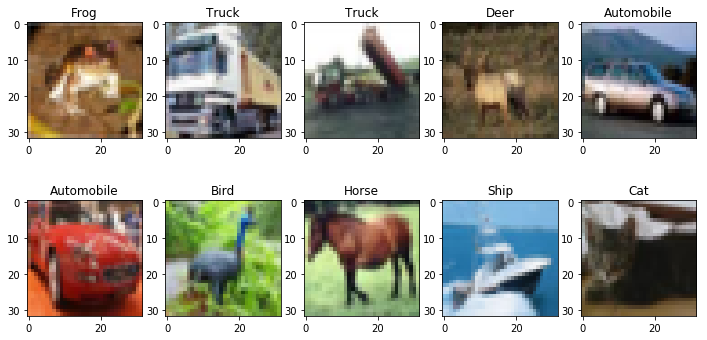

In [5]:
fig = plt.figure(figsize=(12, 6))
for i in range(1, 11):
    img = x_train[i - 1]
    fig.add_subplot(2, 5, i)
    plt.title(titlecase(labels[y_train[i - 1][0]]))
    plt.imshow(img, cmap='gray')
plt.show()

### Preprocess data

In [7]:
def preprocess(images, labels):
    (total, rows, cols, channels) = images.shape
    number_class_labels = len(np.unique(labels))
    images = images.reshape(total, rows, cols, channels)
    images = images.astype('float32')
    images /= 255
    labels = to_categorical(labels, number_class_labels)
    return (images, labels)

In [8]:
from sklearn.model_selection  import train_test_split
# Preprocess train set
(X_train, Y_train) = preprocess(x_train, y_train)

# Preprocess train set
(X_test, Y_test) = preprocess(x_test, y_test)

(X_train, X_val, Y_train, Y_val) = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 21)

### Create our convolutional model

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.callbacks import LearningRateScheduler

In [10]:
def schedule_rate(epoch):
    if epoch > 75:
        return 0.0005
    elif epoch > 100:
        return 0.0003       
    return 0.001

In [11]:
# Create model here
def cnn_model(x_train, y_train, x_val, y_val, epochs):
    model = Sequential()

    model.add(Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides = 2))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides = 2))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3,3), padding='same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides = 2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(64,activation = 'relu'))
    model.add( Dropout(0.25))
    model.add(Dense(32,activation = 'relu'))
    model.add( Dropout(0.25))
    model.add(Dense(10, activation = 'softmax'))

    model.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])

    history = model.fit(
                        x_train,y_train,
                        validation_data = [x_val, y_val],
                        batch_size = 25,
                        epochs = epochs,
                        verbose = 0,
                        callbacks = [LearningRateScheduler(schedule_rate)])  

    return history,model

In [73]:
epochs = 100
history,model = cnn_model(X_train, Y_train, X_val, Y_val, epochs)

In [13]:
from keract import get_activations, display_activations
def print_names_and_shapes(activations):  
    for layer_name, layer_activations in activations.items():
        print(layer_name)
        print(layer_activations.shape)
        print('')

In [14]:
print_names_and_shapes(get_activations(model, X_train[0:500]))

conv2d_1/Relu:0
(500, 32, 32, 32)

batch_normalization_1/cond/Merge:0
(500, 32, 32, 32)

conv2d_2/Relu:0
(500, 32, 32, 32)

batch_normalization_2/cond/Merge:0
(500, 32, 32, 32)

max_pooling2d_1/MaxPool:0
(500, 16, 16, 32)

dropout_1/cond/Merge:0
(500, 16, 16, 32)

conv2d_3/Relu:0
(500, 16, 16, 64)

batch_normalization_3/cond/Merge:0
(500, 16, 16, 64)

conv2d_4/Relu:0
(500, 16, 16, 64)

batch_normalization_4/cond/Merge:0
(500, 16, 16, 64)

max_pooling2d_2/MaxPool:0
(500, 8, 8, 64)

dropout_2/cond/Merge:0
(500, 8, 8, 64)

conv2d_5/Relu:0
(500, 8, 8, 128)

batch_normalization_5/cond/Merge:0
(500, 8, 8, 128)

conv2d_6/Relu:0
(500, 8, 8, 128)

batch_normalization_6/cond/Merge:0
(500, 8, 8, 128)

max_pooling2d_3/MaxPool:0
(500, 4, 4, 128)

dropout_3/cond/Merge:0
(500, 4, 4, 128)

flatten_1/Reshape:0
(500, 2048)

dense_1/Relu:0
(500, 64)

dropout_4/cond/Merge:0
(500, 64)

dense_2/Relu:0
(500, 32)

dropout_5/cond/Merge:0
(500, 32)

dense_3/Softmax:0
(500, 10)



'Cat'

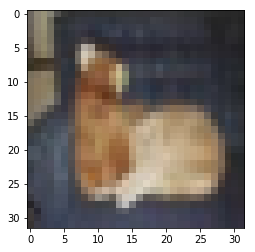

In [43]:
test = x_train[17].reshape(1,32,32,3)
plt.imshow(np.squeeze(test), interpolation='None', cmap='gray')
titlecase(labels[y_train[17][0]])

Displaying activation map 0


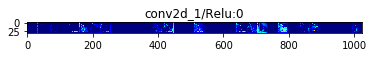

Displaying activation map 1


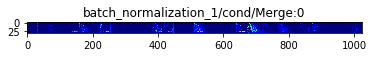

Displaying activation map 2


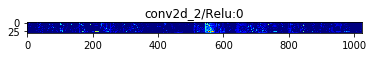

Displaying activation map 3


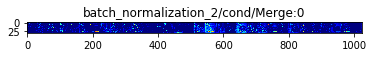

Displaying activation map 4


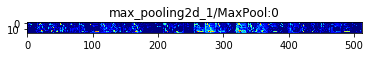

Displaying activation map 5


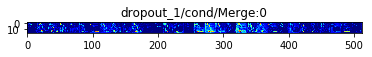

Displaying activation map 6


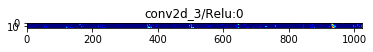

Displaying activation map 7


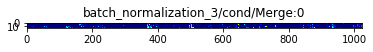

Displaying activation map 8


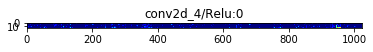

Displaying activation map 9


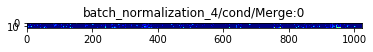

Displaying activation map 10


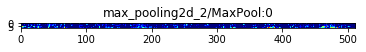

Displaying activation map 11


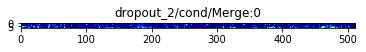

Displaying activation map 12


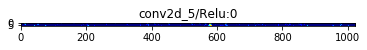

Displaying activation map 13


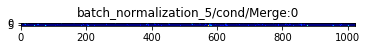

Displaying activation map 14


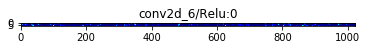

Displaying activation map 15


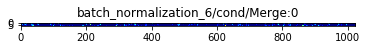

Displaying activation map 16


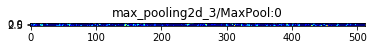

Displaying activation map 17


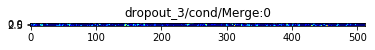

Displaying activation map 18


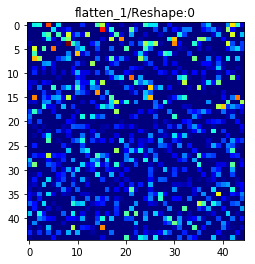

Displaying activation map 19


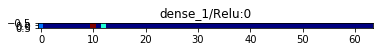

Displaying activation map 20


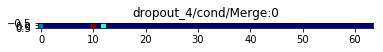

Displaying activation map 21


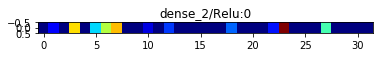

Displaying activation map 22


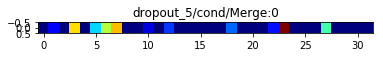

Displaying activation map 23


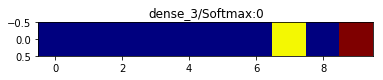

In [44]:
plt.figure(figsize=(6,6))
a = get_activations(model, test)
display_activations(a)

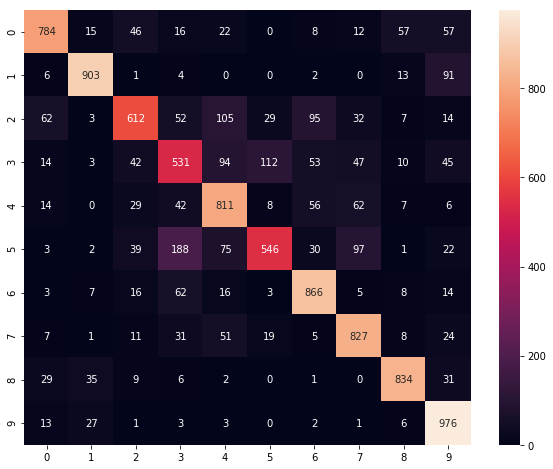

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_prediction = model.predict(X_val)
y_pred_classes = np.argmax(y_prediction,axis = 1) 
y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,annot=True,fmt="d")

'Truck'

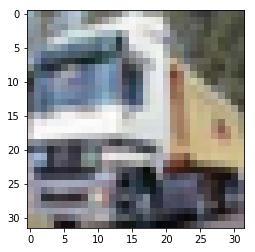

In [47]:
#Input Layer
#Activation index can only be given before the flatten
from keras.models import Model
test1 = x_train[1].reshape(1,32,32,3)
plt.imshow(np.squeeze(test1), interpolation='None', cmap='gray')
titlecase(labels[y_train[1][0]])

In [48]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test1)
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index = 0
    fig, axis = plt.subplots(row_size, col_size, figsize=(row_size*2,col_size*1))
    for row in range(0,row_size):
        for col in range(0,col_size):
            axis[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

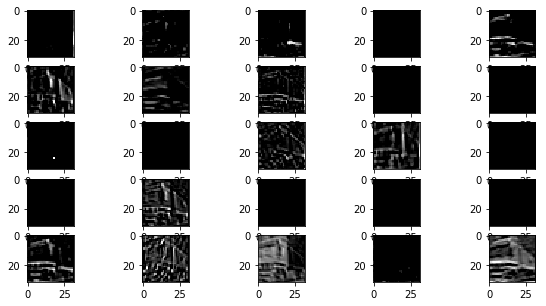

In [49]:
display_activation(activations, 5, 5, 0)

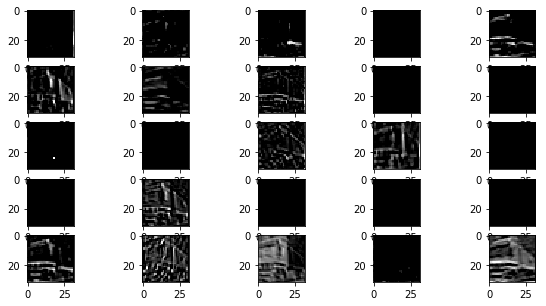

In [50]:
display_activation(activations, 5, 5, 1)

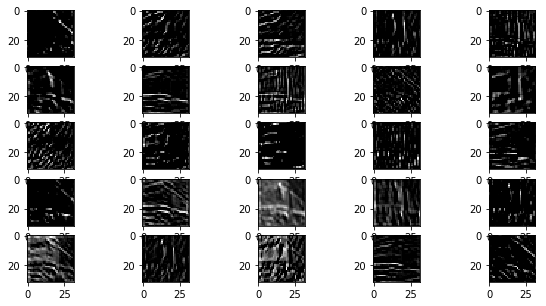

In [51]:
display_activation(activations, 5, 5, 2)

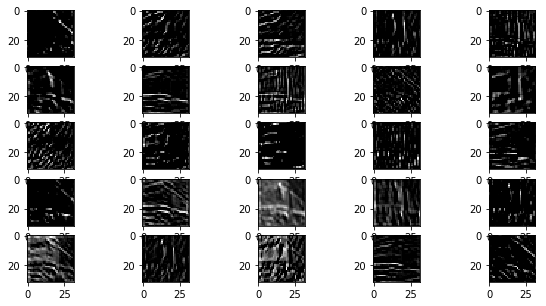

In [52]:
display_activation(activations, 5, 5, 3)

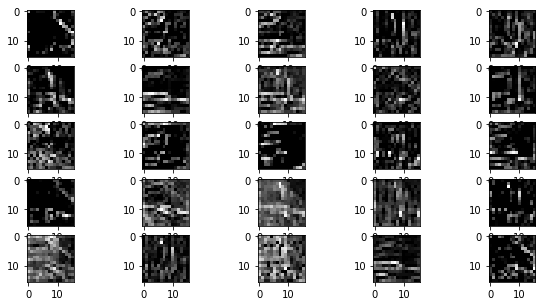

In [53]:
display_activation(activations, 5, 5, 4)

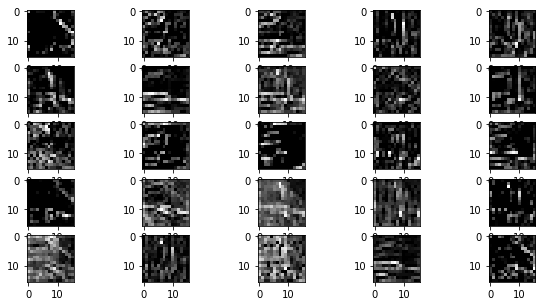

In [54]:
display_activation(activations, 5, 5, 5)

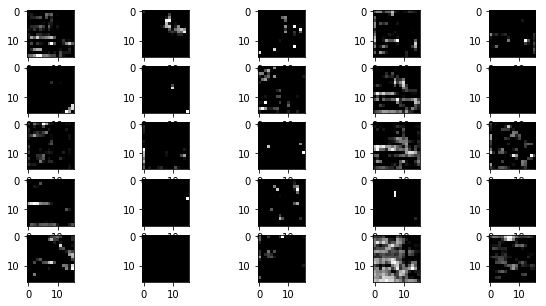

In [55]:
display_activation(activations, 5, 5, 6)

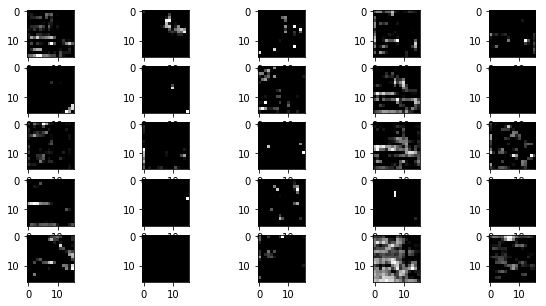

In [56]:
display_activation(activations, 5, 5, 7)

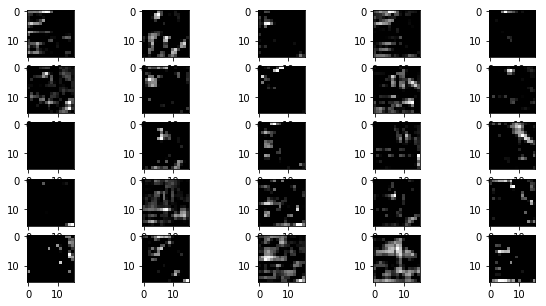

In [57]:
display_activation(activations, 5, 5, 8)

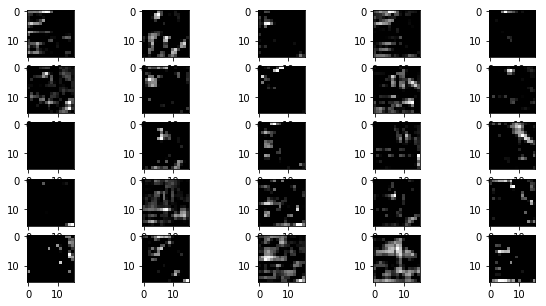

In [58]:
display_activation(activations, 5, 5, 9)

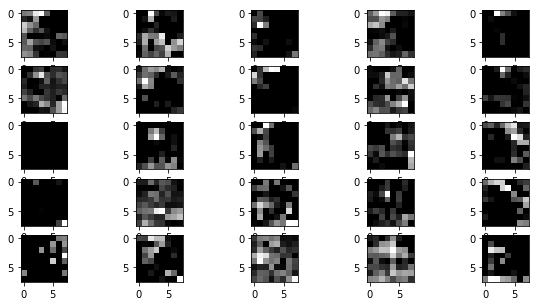

In [59]:
display_activation(activations, 5, 5, 10)

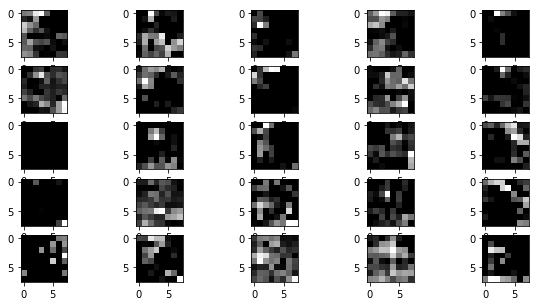

In [60]:
display_activation(activations, 5, 5, 11)

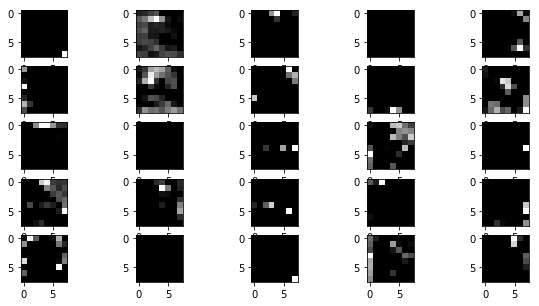

In [61]:
display_activation(activations, 5, 5, 12)

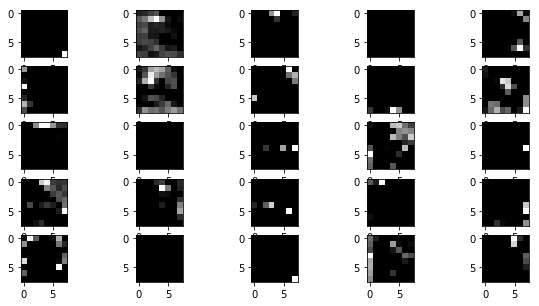

In [62]:
display_activation(activations, 5, 5, 13)

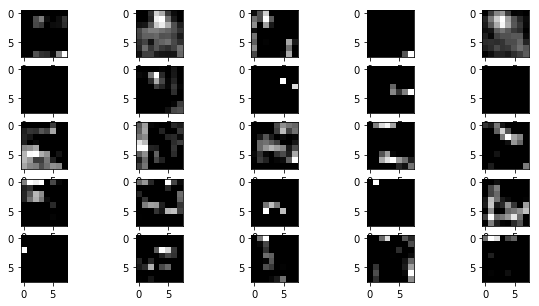

In [63]:
display_activation(activations, 5, 5, 14)

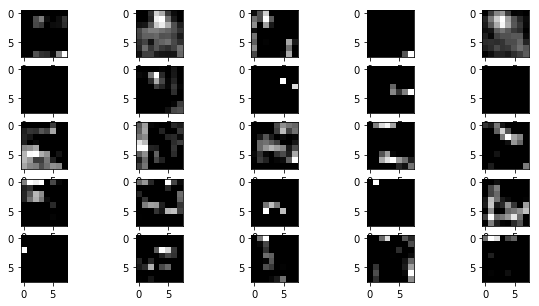

In [64]:
display_activation(activations, 5, 5, 15)

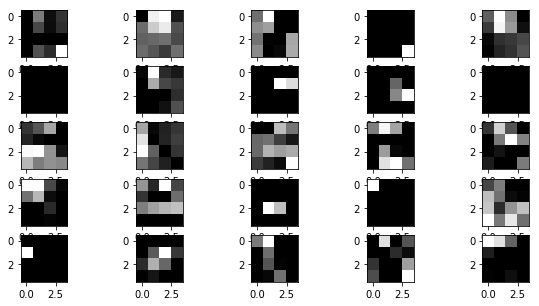

In [65]:
display_activation(activations, 5, 5, 16)

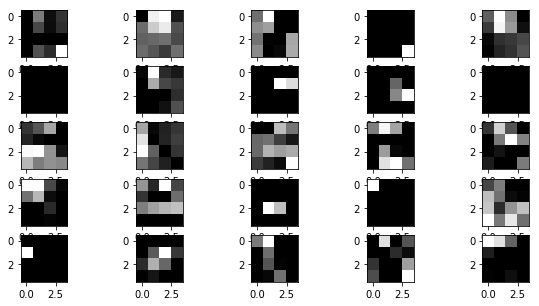

In [66]:
display_activation(activations, 5, 5, 17)

In [77]:
def score_of_model(trained_model,images,labels,type_of_data):
    score = trained_model.evaluate(images,labels,verbose=0)
    print(type_of_data)
    print("Loss: %f" %(score[0]))
    print("Accuracy: %f" %(score[1]))
    print()

In [78]:
print("Accuracies without Data Generator")
score_of_model(model, X_train, Y_train,"Training Data")
score_of_model(model, X_val, Y_val,"Validation Data")
score_of_model(model, X_test, Y_test,"Testing Data")

Accuracies without Data Generator
Training Data
Loss: 0.021669
Accuracy: 0.994450

Validation Data
Loss: 0.582125
Accuracy: 0.867200

Testing Data
Loss: 0.594936
Accuracy: 0.859100



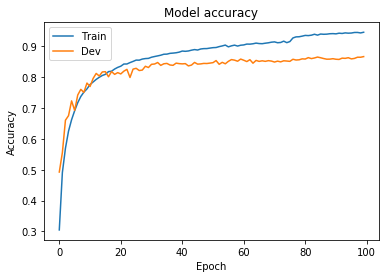

In [76]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='upper left')
plt.show()

In [47]:
model.save_weights("model_visualisation.h5")
model_json = model.to_json()
with open("model_visualisation.json", "w") as json_file:
    json_file.write(model_json)

In [48]:
from keras.models import model_from_json
json_file = open('model_visualisation.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

In [49]:
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model_visualisation.h5")